In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import spacy
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud


from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [69]:
data = pd.read_csv("/drive/My Drive/text-mining/Elon_musk.csv",encoding = 'mac_roman',error_bad_lines = False)
data

,Unnamed: 0,Text
0,1,@kunalb11 Iím an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [70]:
data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [71]:
data.rename({'Text':'tweets'},axis = 1,inplace=True)
data.head()

,tweets
0,@kunalb11 Iím an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [72]:
data.isna().sum()

tweets    0
dtype: int64

In [73]:
#Remove empty strings and both leading and trailing characters

In [74]:
data = [tweets.strip() for tweets in data.tweets]
data = [tweets for tweets in data if tweets]
data[0:10]

['@kunalb11 Iím an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [75]:
#Joining list into one String / Text

In [76]:
text = ' '.join(data)
text[0:100]

'@kunalb11 Iím an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you trie'

In [77]:
#remove twitter user handle names  from a given twitter text

In [78]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_token = tknzr.tokenize(text)
print(tweets_token)

['Iím', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'Itís', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be', 'a', 'toddler'

In [79]:
#again joining the list
tweets_token_text = ' '.join(tweets_token)
tweets_token_text[0:100]

'Iím an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview !'

In [80]:
tweets_punc_remove = tweets_token_text.translate(str.maketrans('','',string.punctuation))
tweets_punc_remove

'Iím an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS Itís getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that wonít give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together 

In [81]:
#Removing 'https' / 'url' within text

In [82]:
import re
tweets_url_remove = re.sub(r'http\S+', '', tweets_punc_remove)
tweets_url_remove

'Iím an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  Itís getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that wonít give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well  Star

In [83]:
#Splitting a sentence into a Words / Tokens

In [84]:
from nltk.tokenize import word_tokenize
tweet_words = word_tokenize(tweets_url_remove , language = 'english', preserve_line = True)
print(tweet_words)

['Iím', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'Itís', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Please', 'unlock', '

In [85]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
#tokens count
len(tweet_words)

17296

In [87]:
#Removing Stop Words

In [88]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
tweet_stopwords = stopwords.words('english')

SW_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','Ö','orÖ']
tweet_stopwords.extend(SW_list)

tweet_no_stopwords = [words for words in tweet_words if words not in tweet_stopwords]
print(tweet_no_stopwords)

['Iím', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'Itís', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'wonít', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'pred

In [89]:
# Normalizing the data :

tweet_lower_words = [Text.lower() for Text in tweet_no_stopwords]
tweet_lower_words[0:10]

['iím',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great']

In [90]:
# Stemming the data :

from nltk.stem import PorterStemmer
ps = PorterStemmer()

tweet_stemmed = [ps.stem(word) for word in tweet_lower_words]
tweet_stemmed[0:10]

['iím',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great']

In [91]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(tweet_lower_words))
doc[0:10]

iím alien ray tracing cyberpunk hdr nextlevel have tried great

In [92]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['iím', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'itís', 'getting', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'wonít', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 're

In [93]:
clean_tweets = ' '.join(lemmas)
clean_tweets

'iím alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse itís getting real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet wonít give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however donö spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable gö itís mean price country only difference taxis ship this intend earth may idea apply mar 

In [94]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'iím': 1667, 'alien': 206, 'ray': 2473, 'trace': 3173, 'cyberpunk': 816, 'hdr': 1433, 'nextlevel': 2070, 'have': 1427, 'try': 3205, 'great': 1378, 'interview': 1636, 'doge': 944, 'underestimate': 3338, 'congratulation': 719, 'tesla': 3058, 'china': 624, 'amazing': 231, 'execution': 1123, 'last': 1733, 'year': 3580, 'now': 2099, 'next': 2069, 'even': 1095, 'happy': 1414, 'new': 2067, 'ox': 2208, 'frodo': 1277, 'underdoge': 3337, 'all': 209, 'thought': 3108, 'would': 3562, 'fail': 1162, 'himself': 1480, 'haha': 1402, 'thank': 3070, 'indeed': 1577, 'tweet': 3220, 'definitely': 856, 'represent': 2539, 'realworld': 2487, 'time': 3125, 'allocation': 210, 'the': 3079, 'entertaining': 1063, 'outcome': 2187, 'likely': 1792, 'just': 1690, 'send': 2688, 'agree': 191, 'clubhouse': 654, 'itís': 1663, 'getting': 1339, 'real': 2482, 'buy': 532, 'dogecoin': 946, 'lil': 1794, 'toddler': 3140, 'hodler': 1486, 'he': 1434, 'issue': 1658, 'sentencing': 2693, 'seem': 2680, 'bit': 447, 'high': 1471, 'fix': 

In [95]:
print(x.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [96]:
#fitting unigram,bigram and trigram
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [97]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [98]:
#fitting our term frequency- inverse document frequency vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_feat = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram = tfidfv_ngram_max_feat.fit_transform(lemmas)
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [99]:
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


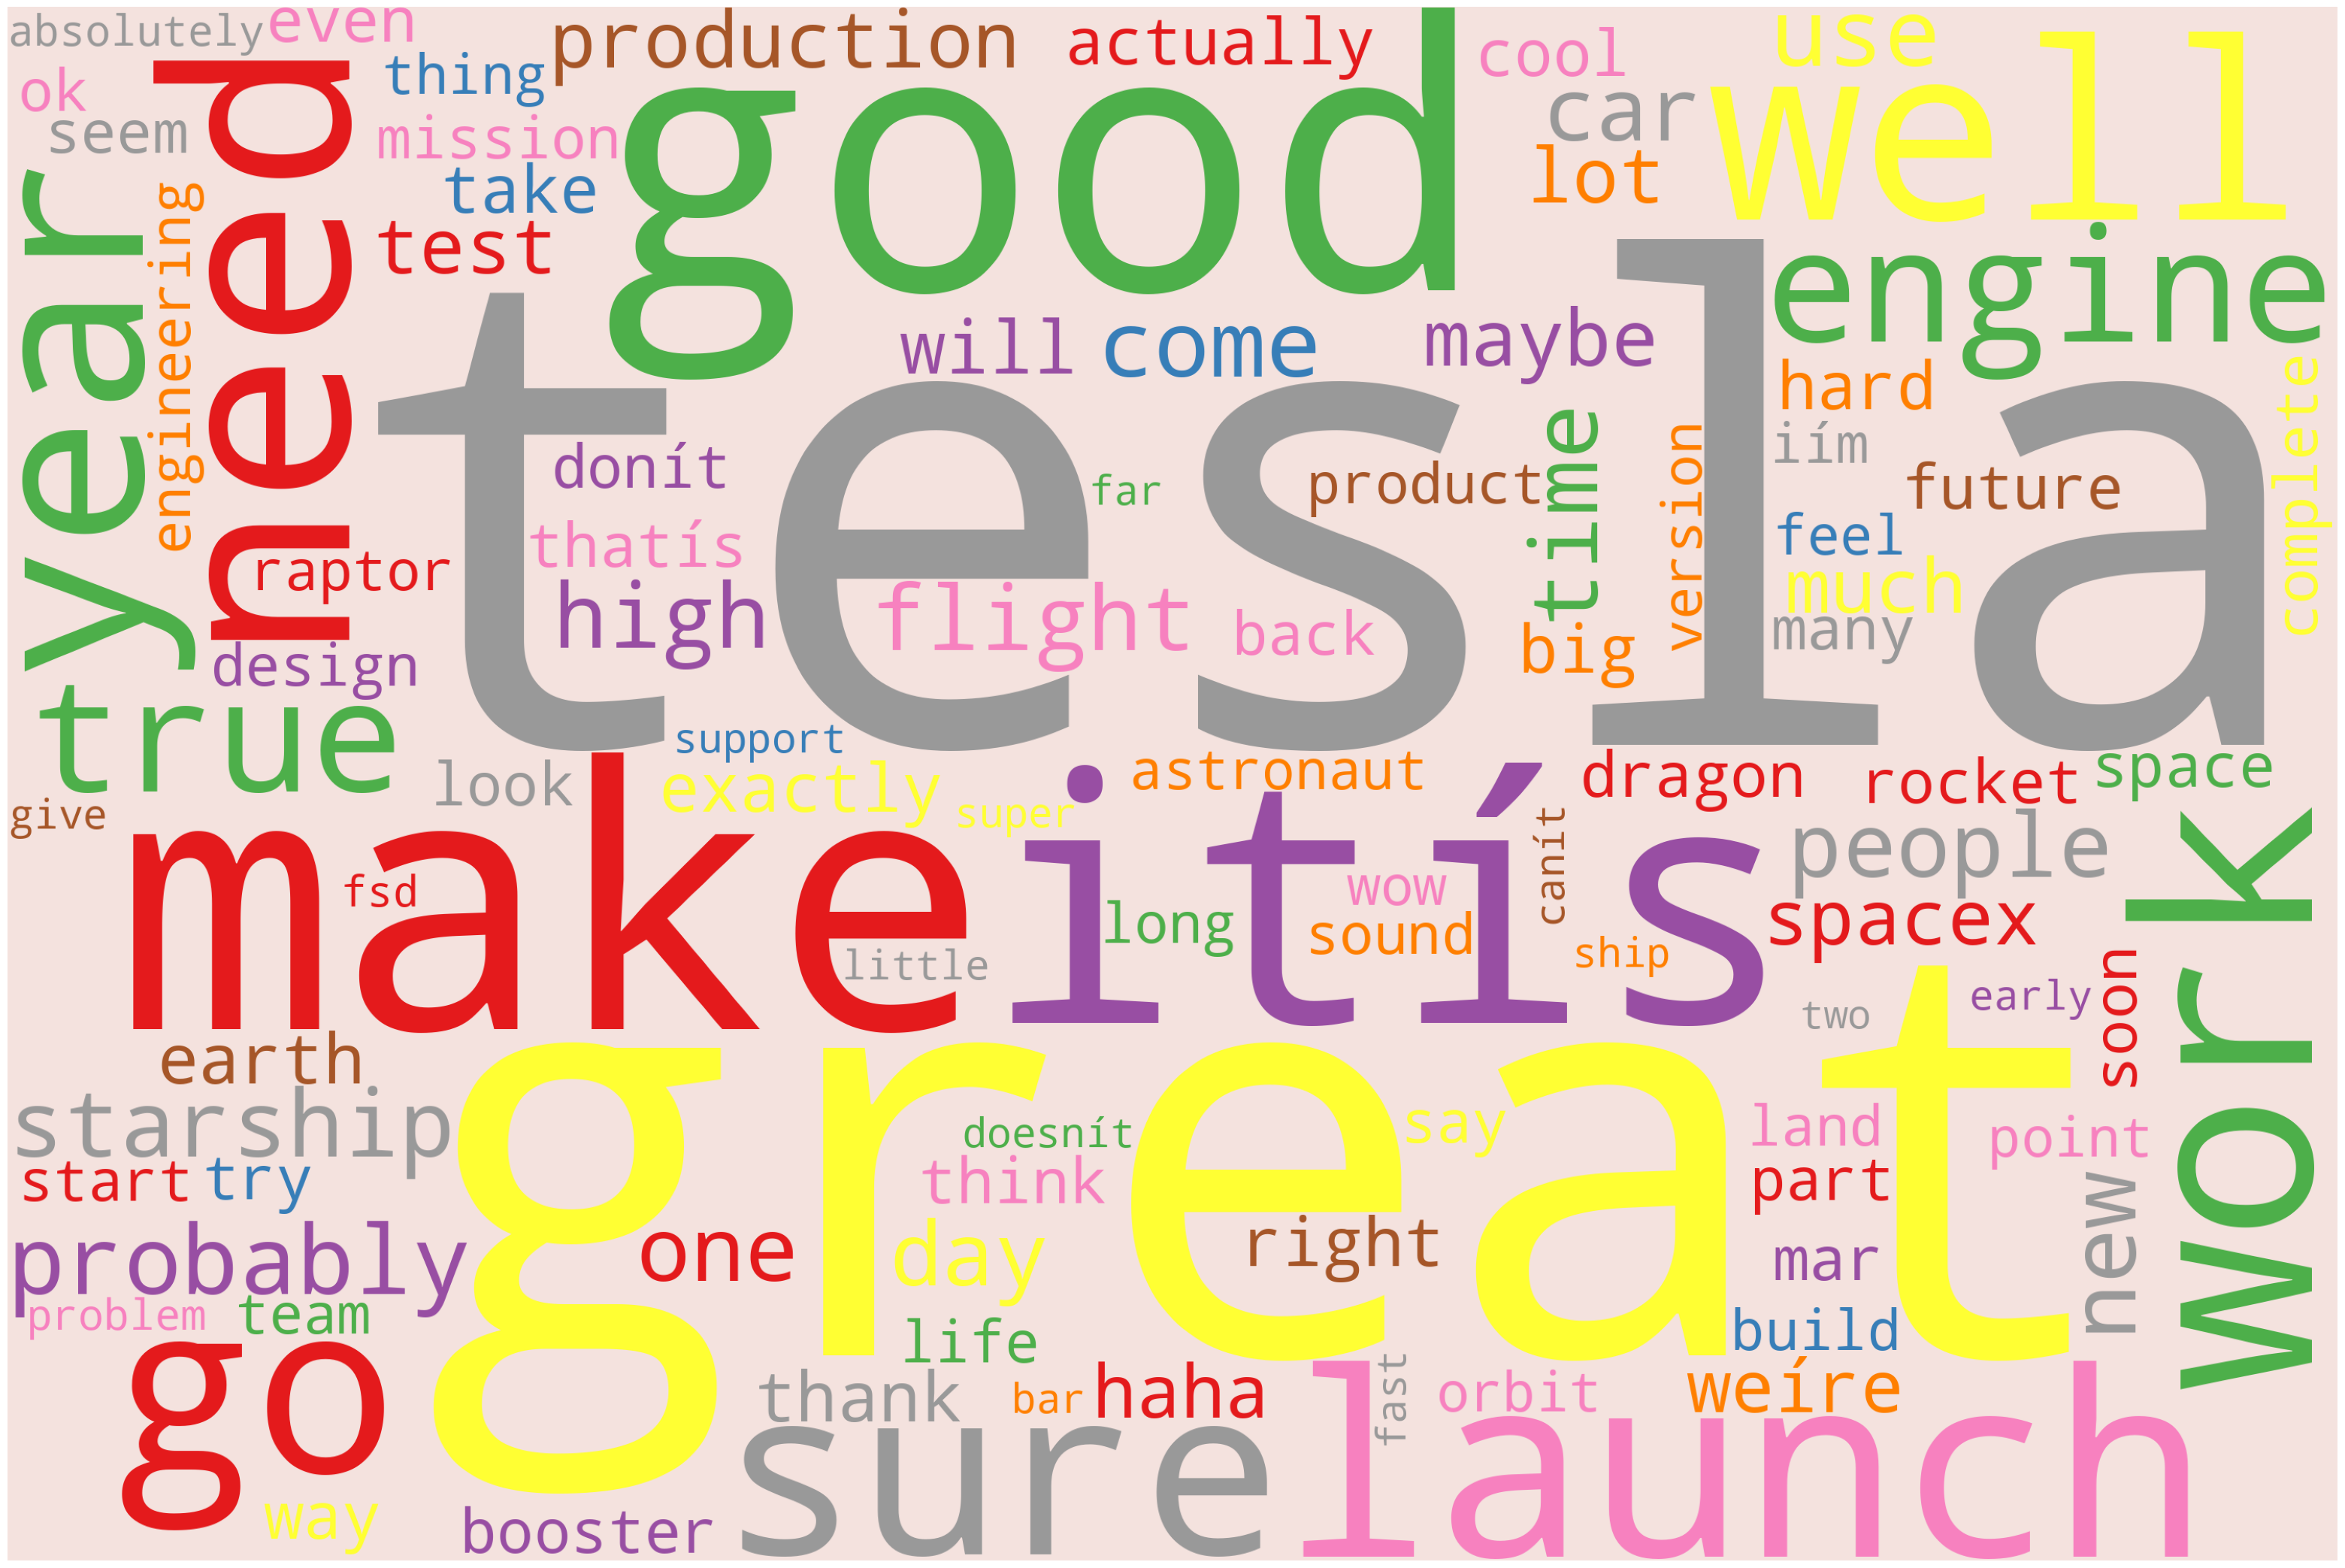

In [100]:
#wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')

wordcloud = WordCloud(width= 3000, height= 2000,background_color='#F4E2DE',max_words=100,
                     colormap='Set1',stopwords=STOPWORDS,contour_color='black',contour_width=2).generate(clean_tweets)
plot_cloud(wordcloud)

In [101]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter=True)

In [102]:
#printing position of words
for token in doc_block[0:20]:
    print(token,token.pos_)

iím AUX
alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN


In [103]:
#filtering only nouns , verbs and Adjectives only
nouns_verbs_adj = [token.text for token in doc_block if token.pos_ in('NOUN','VERB','ADJECTIVE')]
print(nouns_verbs_adj[100:200])

['fix', 'unit', 'time', 'whereasö', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ogecoin', 'video', 'people', 'speak', 'cute', 'image', 'doesnít', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greateö', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'launch', 'ís', 'galaxy', 'explore', 'unö', 'launch', 'starlink', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine', 'shut']


In [104]:
#counting nouns,verbs and adjectives
cv = CountVectorizer()
X2 = cv.fit_transform(nouns_verbs_adj)
sum_words = X2.sum(axis = 0)

words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:11]

,word,count
0,tesla,71
1,make,62
2,launch,60
3,year,49
4,work,47
5,need,46
6,go,44
7,come,41
8,day,37
9,get,37


<Axes: title={'center': 'top 10 verbs,adjectives and nouns'}, xlabel='word'>

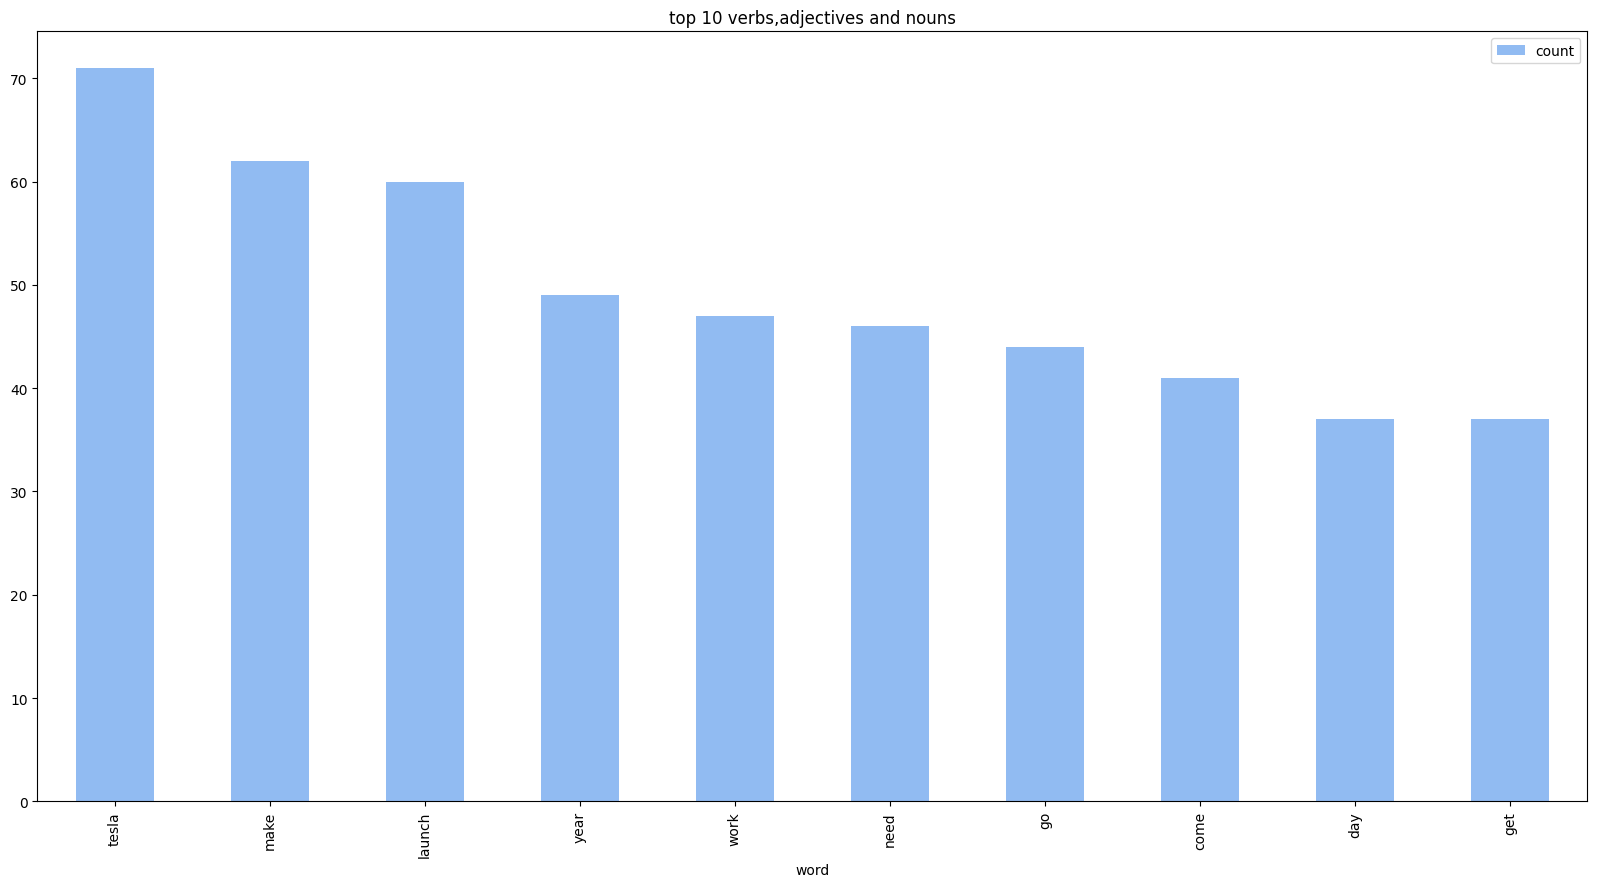

In [105]:
#visualizing our results on barplot
wd_df[0:10].plot.bar(x = 'word',figsize =(20,10),title = 'top 10 verbs,adjectives and nouns',color = '#91BBF2')

In [106]:
from nltk import tokenize
#breaking tweets into sentences
sentences = tokenize.sent_tokenize(' '.join(data))
sentences[0:10]


['@kunalb11 Iím an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Itís getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [107]:
#storing sentences into dataframe
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
912,"@kenyanwalstreet Not actually a payout, just a..."
913,"It may never pay out, as the stock canít bÖ ht..."
914,Details Aug 28.
915,AI symbiosis while u wait @vistacruiser7 @flcn...


In [108]:
affin = pd.read_csv("/drive/My Drive/text-mining/Afinn.csv",sep = ",",encoding = "Latin-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [109]:
affin_scores = affin.set_index('word')['value'].to_dict()
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [110]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affin_scores

def calculate_sentiment(text:str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [111]:
calculate_sentiment(text = 'great')

3

In [112]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
912    0
913   -4
914    0
915   -2
916    0
Name: sentiment_value, Length: 917, dtype: int64

In [113]:
sent_df.sort_values(by = 'sentiment_value')

,sentence,sentiment_value
831,Cool Model 3 review by @iamjamiefoxx https://t...,-8
643,Very baÖ https://t.co/tJsh1Exz1Q @justpaulinel...,-8
64,"Also, the road to hell is mostly paved with ba...",-7
913,"It may never pay out, as the stock canít bÖ ht...",-4
675,"Occasional flights from land are ok, but frequ...",-4
...,...,...
641,ItísÖ https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
80,@teslaownersSV This is a good one @MrBeastYT I...,13
104,@Erdayastronaut @SpaceX Was also thinking that...,16
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16


In [114]:
sent_df[sent_df['sentiment_value']<=0]


,sentence,sentiment_value
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
...,...,...
912,"@kenyanwalstreet Not actually a payout, just a...",0
913,"It may never pay out, as the stock canít bÖ ht...",-4
914,Details Aug 28.,0
915,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [115]:
sent_df[sent_df['sentiment_value'] > 0]

,sentence,sentiment_value
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2
9,The most entertaining outcome is the most like...,3
17,Back to work I go Ö @CapybaraSurfer @MattWalla...,4
...,...,...
904,He was one of the very best.,3
906,"@Ali_Afshari In general, we need to improve ho...",4
908,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3
910,This is both great &amp; terrifying.,3


In [116]:
sent_df['index'] = range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0,0
1,Have you tried it?,0,1
2,@joerogan @Spotify Great interview!,3,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3
4,Now on to the next for even more!!,0,4
...,...,...,...
912,"@kenyanwalstreet Not actually a payout, just a...",0,912
913,"It may never pay out, as the stock canít bÖ ht...",-4,913
914,Details Aug 28.,0,914
915,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,915


In [ ]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.distplot(sent_df['sentiment_value'])
plt.title('Sentiment Value Plot')
plt.show()